# NLP & Binary Classification: IMDB sentiment analysisdata
https://keras.io/datasets/


** Dataset Information: **

Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative)

** Attribute Information: (1 features and 1 class) **

- review: preprocessed, a sequence of word indexes
- sentiment: positive/negative

** Objective of this project **

predict whether a review is thumbs-up or thumbs-down

# Data

In [37]:
import numpy as np
from keras.datasets import imdb
from matplotlib import pyplot as plt
%matplotlib inline

# load Data
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [43]:
# feature (review)
print(X.shape,y.shape)
#X[0]

(50000,) (50000,)


In [44]:
# class (setiment)
print(np.unique(y_train,return_counts=True))

(array([0, 1], dtype=int64), array([12500, 12500], dtype=int64))


In [45]:
# total unique words
print(len(np.unique(np.hstack(X))))

88585


Review length: Mean 234.8 words (172.9)


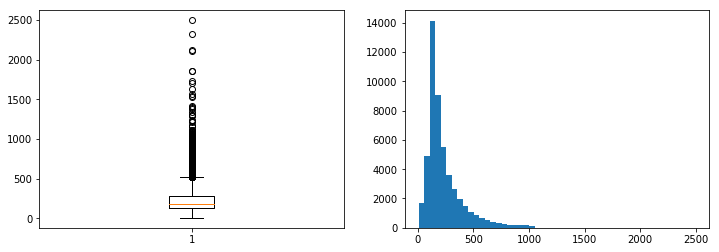

In [47]:
# review length
result = [len(x) for x in X]
print("Review length: Mean %.1f words (%.1f)" % (np.mean(result), np.std(result)))

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.boxplot(result)
plt.subplot(1, 2, 2)
plt.hist(result,bins=50)
plt.show()

# Data Preprocessing

In [86]:
# fix random seed for reproducibility
seed = 101
np.random.seed(seed)

In [72]:
# load the top 5000 words (vocabulary)
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)
#X_train[0]

(25000,) (25000,) (25000,) (25000,)


In [73]:
# truncate reviews at 500 words and zero padding for shorter one
from keras.preprocessing import sequence
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)
#X_train[0]

(25000, 500) (25000, 500)


# 1. MLP model

### Model Train

In [92]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Embedding
import keras.backend as K

np.random.seed(seed)
K.clear_session()

# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=X_train.shape[1]))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, 
          batch_size=128, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/2
 - 43s - loss: 0.5631 - acc: 0.6579 - val_loss: 0.3106 - val_acc: 0.8666
Epoch 2/2
 - 45s - loss: 0.2075 - acc: 0.9197 - val_loss: 0.3151 - val_acc: 0.8683


### Model Evaluation with Test Set

Accuracy: 86.8%


             precision    recall  f1-score   support

          0       0.91      0.81      0.86     12500
          1       0.83      0.92      0.88     12500

avg / total       0.87      0.87      0.87     25000



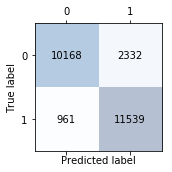

In [93]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# predict class with test set
y_pred_test =  model.predict_classes(X_test, batch_size=128, verbose=0)
print('Accuracy: {:0.1f}%'.format(accuracy_score(y_test,y_pred_test)*100))

#classification report
print('\n')
print(classification_report(y_test, y_pred_test))

#confusion matrix
confmat = confusion_matrix(y_test, y_pred_test)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

# 2. 1D CNN model

### Model Train

In [94]:
from keras.layers import Conv1D,MaxPooling1D

np.random.seed(seed)
K.clear_session()

# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, 
          batch_size=128, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
_________________________________________________________________


### Model Evaluation with Test Set

Accuracy: 88.6%


             precision    recall  f1-score   support

          0       0.91      0.85      0.88     12500
          1       0.86      0.92      0.89     12500

avg / total       0.89      0.89      0.89     25000



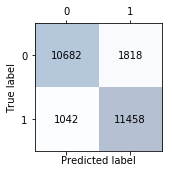

In [95]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# predict class with test set
y_pred_test =  model.predict_classes(X_test, batch_size=128, verbose=0)
print('Accuracy: {:0.1f}%'.format(accuracy_score(y_test,y_pred_test)*100))

#classification report
print('\n')
print(classification_report(y_test, y_pred_test))

#confusion matrix
confmat = confusion_matrix(y_test, y_pred_test)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

# 3. RNN model

### Model Train

In [99]:
from keras.layers import LSTM

np.random.seed(seed)
K.clear_session()

# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=X_train.shape[1]))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, 
          batch_size=128, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 168,353
Trainable params: 168,353
Non-trainable params: 0
_________________________________________________________________
None
Train on 25000 samples, validate on 25000 samples
Epoch 1/2
 - 156s - loss: 0.5565 - acc: 0.7131 - val_loss: 0.4148 - val_acc: 0.8152
Epoch 2/2
 - 147s - loss: 0.3776 - acc: 0.8405 - val_loss: 0.3911 - val_acc: 0.8245


### Model Evaluation with Test Set

Accuracy: 82.5%


             precision    recall  f1-score   support

          0       0.86      0.78      0.82     12500
          1       0.80      0.87      0.83     12500

avg / total       0.83      0.82      0.82     25000



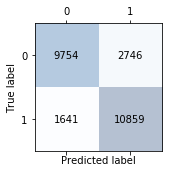

In [100]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# predict class with test set
y_pred_test =  model.predict_classes(X_test, batch_size=128, verbose=0)
print('Accuracy: {:0.1f}%'.format(accuracy_score(y_test,y_pred_test)*100))

#classification report
print('\n')
print(classification_report(y_test, y_pred_test))

#confusion matrix
confmat = confusion_matrix(y_test, y_pred_test)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()